# Import Data

In [223]:
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import find_dotenv, load_dotenv
# add the 'src' directory as one where we can import modules
root_dir = os.path.join(os.getcwd(), os.pardir,os.pardir)
src_dir = os.path.join(os.getcwd(), os.pardir,os.pardir, 'src')
if src_dir not in sys.path: sys.path.append(src_dir)

root_dir = os.path.join(os.getcwd(), os.pardir,os.pardir)
from dotenv import find_dotenv, load_dotenv

import pandas as pd
import math
import numpy as np

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import copy as cp

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy import stats

import plotly.plotly as py
import plotly.graph_objs as go

from IPython.display import display


from data import preprocessing as prp
%aimport data.preprocessing

#Load env vars
load_dotenv(find_dotenv())


subfolder = os.getenv("SUBFOLDER")
PREFIX = os.getenv("PREFIX")

raw_path = os.path.join(root_dir,"data\\raw\\",subfolder)
interim_path = os.path.join(root_dir,"data\\interim\\",subfolder)



# #Product and promo files
# df_product = pd.read_csv(data_path + "data_prod_bnd_ita.csv", sep = ";", encoding = 'iso8859_2')
# # df_promo = pd.read_csv(data_path + "data_promo_bnd_ita2.csv", sep = ";", encoding = 'iso8859_2')

# #History files for P2C1 and P2C4
# df_histo_p2c1 = pd.read_csv(data_path + "data_histo_bnd_ita_p2c1.csv", sep = ";", encoding = 'iso8859_2', header = 0)
# df_histo_p2c4 = pd.read_csv(data_path + "data_histo_bnd_ita_p2c4.csv", sep = ";", encoding = 'iso8859_2', header = 0)


# #Client files
# df_client = pd.read_csv(data_path + "data_client_bnd_ita.csv", sep = ";", encoding = 'iso8859_2', header = 0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Daily Files
Load very large file

In [646]:


row_headers = ['Product','Client']

row_headers = ["Produit"]
n_row_headers = len(row_headers)


p2c4File = "histo_7cerf_p1c1.txt"

df_histo_p2c1_jour = pd.read_csv(raw_path + p2c4File, sep = ",", encoding = 'utf-8', header = None,dtype={0:str}).fillna(0)

df_histo_p2c1_jour=  df_histo_p2c1_jour.drop([1,3,4,5,6],axis=1)

sales_df = df_histo_p2c1_jour;


C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [421]:
sales_df.head()

,Product,Client,04/01/2015,11/01/2015,18/01/2015,25/01/2015,01/02/2015,08/02/2015,15/02/2015,22/02/2015,...,11/11/2018,18/11/2018,25/11/2018,02/12/2018,09/12/2018,16/12/2018,23/12/2018,30/12/2018,06/01/2019,13/01/2019
0,30E0001004404,01007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30E0001004404,01008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30E0001004404,01012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30E0001004404,01013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30E0001004404,01016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [647]:
from datetime import datetime


start_date = '01-02-2017' #mm/dd/yyyy
end_date = "01-14-2019"
row_headers = ['Product','Client']
columns = row_headers.copy()
N,M = sales_df.shape

 


nb_days = len(sales_df.columns) - len(row_headers)

date_range = pd.date_range(end = end_date,periods = nb_days, freq='1w').strftime("%d/%m/%Y")
# days = pd.to_datetime(np.arange(0,M-2),unit='D').strftime("%d/%m/%Y")
columns.extend(date_range)
sales_df.columns = columns
print(sales_df.shape)

#drop Client 0
# sales_df = sales_df[sales_df["Client"]!=0]
# print(sales_df.shape)

sales_df.head()

(1459514, 213)


,Product,Client,04/01/2015,11/01/2015,18/01/2015,25/01/2015,01/02/2015,08/02/2015,15/02/2015,22/02/2015,...,11/11/2018,18/11/2018,25/11/2018,02/12/2018,09/12/2018,16/12/2018,23/12/2018,30/12/2018,06/01/2019,13/01/2019
0,30E0001004404,01007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30E0001004404,01008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30E0001004404,01012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30E0001004404,01013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30E0001004404,01016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [584]:
pc_df = sales_df[["Product","Client"]].drop_duplicates().astype(str)
pc_df.head()

,Product,Client
0,30E0001004404,01007
1,30E0001004404,01008
2,30E0001004404,01012
3,30E0001004404,01013
4,30E0001004404,01016


## Keys table

In [594]:
file_name = "product_7cerf.txt"
df_produit = pd.read_csv(raw_path+file_name, sep='\t',encoding="utf8").astype(str)
df_produit = df_produit.drop_duplicates(["Key_lvl1","Description"])[["Key_lvl1","Key_lvl2"]].set_index(["Key_lvl1"]).astype(str)

keys = pc_df.join(df_produit.astype(str),on="Product")

len(list(set(keys.Client)))

1548

## Clients file

In [636]:
file_name = "client_7cerf.txt"
non_unique_features = []
unique_features = []

client_df = pd.read_csv(raw_path+file_name, sep='\t', encoding='utf-8').set_index("Key_lvl1")
features_df = client_df[["Store Level","Business Area"]]#.fillna("None")



display(features_df.info())

cli_features = keys.join(features_df,on="Client",how="left").drop(["Client"],axis=1)

cli_features.head()

# client_df.iloc[:,1].fillna(0).astype(np.float64).plot(kind="hist")

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 01257 to A157001
Data columns (total 2 columns):
Store Level      433 non-null object
Business Area    368 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.1+ KB


None

,Product,Key_lvl2,Store Level,Business Area
0,30E0001004404,3E+101_2,Level C,150.0
1,30E0001004404,3E+101_2,Level A,412.0
2,30E0001004404,3E+101_2,Level B,323.0
3,30E0001004404,3E+101_2,Level A,264.0
4,30E0001004404,3E+101_2,Level C,230.0


In [639]:
display(cli_features.shape)

ctab = pd.crosstab(cli_features.Product,cli_features["Store Level"])

ctab["Missing"] = 0

ctab.head()

(1432725, 4)

Store Level,Duty-free,Large-size,Level A,Level B,Level C,Level D,Level E,N,Standard,Missing
Product,,,,,,,,,,
30E0001004404,0,0,24,40,72,26,4,0,0,0
30E0001005604,0,0,24,41,100,69,52,0,0,0
30E0001007004,0,0,24,40,104,69,64,0,0,0
30E0002001404,0,0,24,41,97,58,31,0,0,0
30E0002005604,0,0,24,41,99,62,38,0,0,0


In [640]:
k1k2 = keys.drop("Client",1).drop_duplicates()
store_counts = k1k2.astype(str).join(ctab,how="inner",on="Product").fillna(0).groupby(["Key_lvl2"]).sum()
store_counts.index.names = ['Product']
print(store_counts.shape)
store_counts.head()
prp.save_file(store_counts,"store_counts",index= True)

(3986, 10)


In [645]:
nulls = k1k2.astype(str).join(ctab,how="left",on="Product")

pnulls = list(nulls[nulls.isnull().any(axis=1)]["Product"])

c = list(set(sales_df[sales_df["Product"].isin(pnulls)]["Client"]))
print(len(c))

ventes = sales_df[sales_df["Client"].isin(c)]

621


In [643]:
ventes.iloc[:,2:].sum(axis=1).shape

# ventes.loc[[811,176,116,485]]

# ventes[ventes.Client=="01364"][[ventes.sum(axis=1)>0]]

(369394,)

## Clients by product

In [235]:
pc_count = sales_df[sales_df.Client!=0][row_headers].groupby(["Product"]).count()
pc_count.head()

,Client
Product,
30E0001004404,176
30E0001005604,308
30E0001007004,325
30E0002001404,270
30E0002005604,283


In [380]:
file_name = "product_7cerf.txt"
df_produit = pd.read_csv(raw_path+file_name, sep='\t',encoding="utf8").astype(str)
df_produit = df_produit.drop_duplicates(["Key_lvl1","Description"])[["Key_lvl1","Key_lvl2"]].set_index(["Key_lvl1"]).astype(str)



pc2_df = df_produit.astype(str).join(pc_count,how="inner")
pc2_df["Product"]= pc2_df.Key_lvl2.apply(lambda x:str(x))
pc2 = pc2_df.groupby(["Product"]).sum()[["Client"]]
prp.save_file(pc2,"p2c1_count",index = True)

pc2.head()



,Client
Product,
3.6E+101_2,6
30E000400_2,629
30E823101_2,69
30E823102_2,70
30E823103_2,69


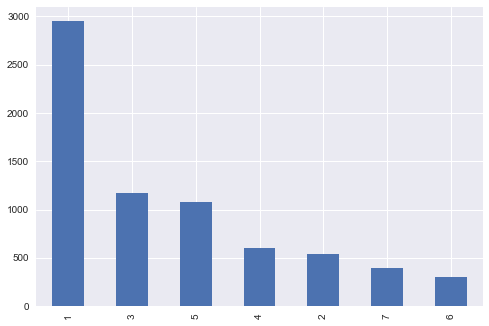

,Client,Range
Product,,
3.6E+101_2,6,2
30E000400_2,629,6
30E823101_2,69,4
30E823102_2,70,4
30E823103_2,69,4


In [214]:
pc2_count["Range"] = pc2_count.Client.apply(lambda x:discretize(x))

h = np.histogram(pc2_count.Client)

                
pc2_count.Range.value_counts().plot(kind="bar")
# pc2_count.Range.plot(kind="box")
plt.show()
# prp.save_file(pc2_count,"p2c1_count",index = True)
pc2_count.head()

## Calculate quantities by product group

In [119]:
#HistPerProduct_p2c4_jour = sales_df.drop(['Client'],axis=1).groupby(["Product"]).sum().fillna(0)

HistPerProduct_p1_jour = sales_df.groupby(["Product"]).sum().fillna(0)
print(HistPerProduct_p1_jour.shape)
HistPerProduct_p1_jour.head()

(9515, 211)


,04/01/2015,11/01/2015,18/01/2015,25/01/2015,01/02/2015,08/02/2015,15/02/2015,22/02/2015,01/03/2015,08/03/2015,...,11/11/2018,18/11/2018,25/11/2018,02/12/2018,09/12/2018,16/12/2018,23/12/2018,30/12/2018,06/01/2019,13/01/2019
Product,,,,,,,,,,,,,,,,,,,,,
30E0001004404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30E0001005604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30E0001007004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30E0002001404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30E0002005604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Level Up

In [129]:
sales_df = HistPerProduct_p1_jour.copy()
file_name = "product_7cerf.txt"
df_produit = pd.read_csv(raw_path+file_name, sep='\t',encoding="utf8").astype(str)
df_produit = df_produit.drop_duplicates(["Key_lvl1","Description"])
df = df_produit[["Key_lvl1","Key_lvl2"]].astype(str).join(sales_df,on='Key_lvl1',how='inner').reset_index(drop = True).dropna(axis = 1)
HistPerProduct_p2_jour = df.drop(["Key_lvl1"],axis = 1).groupby(["Key_lvl2"]).sum()

prp.display(HistPerProduct_p2_jour)

(7037, 211)


,04/01/2015,11/01/2015,18/01/2015,25/01/2015,01/02/2015,08/02/2015,15/02/2015,22/02/2015,01/03/2015,08/03/2015,...,11/11/2018,18/11/2018,25/11/2018,02/12/2018,09/12/2018,16/12/2018,23/12/2018,30/12/2018,06/01/2019,13/01/2019
Key_lvl2,,,,,,,,,,,,,,,,,,,,,
3.6E+101_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30E000400_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30E823101_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30E823102_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30E823103_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
HistPerProduct_p2_jour.join()

TypeError: join() missing 1 required positional argument: 'other'

## Key_to_season files

In [42]:
filename = "product_season"
df = df_produit[["Key_lvl1","Key_lvl2","Sales Season"]].drop_duplicates()
prp.save_file(df,filename)

# Save Data

In [19]:
file_name = "HistPerProduct_p2_jour.csv"
HistPerProduct_p2_jour.to_csv(interim_path+file_name, sep=';', encoding='utf-8', index = True )

# Display Data

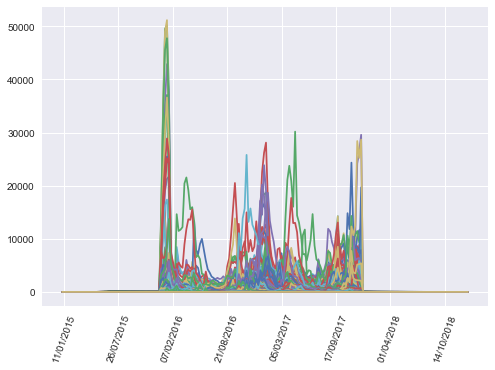

In [43]:
list_it = list(range(len(HistPerProduct_p2_jour.columns)))

tick_frequency = 4 * 7 

for index, row in HistPerProduct_p2_jour.iloc[:,n_row_headers:].iterrows():
    plt.plot(list(row))

plt.xticks(list_it[n_row_headers::tick_frequency], list(HistPerProduct_p2_jour.columns)[n_row_headers::tick_frequency], rotation = 70)
plt.show()

# Transform Data

In [2]:
def get_list_client_lvl1(str_ClientPromo, df_AllClient):
    
    list_client = []
    
    for index, row in df_client.iterrows():
       
        if (row['Key_lvl1'] == str_ClientPromo 
        or row['Key_lvl2'] == str_ClientPromo 
        or row['Key_lvl3'] == str_ClientPromo 
        or row['Key_lvl4'] == str_ClientPromo 
        or row['Key_lvl5'] == str_ClientPromo 
        or row['Key_lvl6'] == str_ClientPromo ):                     
            list_client.append(row['Key_lvl1'])
            
    return list_client



def get_list_client_lvl4(str_ClientPromo, df_AllClient):
    
    list_client = []
    
    for index, row in df_client.iterrows():
       
        if (row['Key_lvl1'] == str_ClientPromo 
            or row['Key_lvl2'] == str_ClientPromo 
            or row['Key_lvl3'] == str_ClientPromo 
            or row['Key_lvl4'] == str_ClientPromo 
            or row['Key_lvl5'] == str_ClientPromo 
            or row['Key_lvl6'] == str_ClientPromo ):                     
           
            list_client.append(row['Key_lvl4'])
            
    return list(set(list_client))

test_promo_cli = '1'  

#Get clients of level 1 and 4
list_lvl1_cli = get_list_client_lvl1(test_promo_cli, df_client)
list_lvl4_cli = get_list_client_lvl4(test_promo_cli, df_client)


#Get unique products of level 1 clients
df_HistoCli_p2c1 = df_histo_p2c1.loc[df_histo_p2c1['Client'].isin(list_lvl1_cli)]
list_UnqProd = list(set(df_HistoCli_p2c1['Product']))

#Create empty DF for unique products
df_HistPerProduct_p2c1 = pd.DataFrame(columns = df_HistoCli_p2c1.columns, index = list_UnqProd)




#Actually a group by/SUM of unqiue products
for str_prod in list_UnqProd:
    df_temp = df_HistoCli_p2c1[df_HistoCli_p2c1['Product'] == str_prod]
    df_test = df_temp.sum(axis = 0, skipna = True) 
    df_HistPerProduct_p2c1.loc[str_prod] = df_test
    

df_HistPerProduct_p2c1.drop(['Product', 'Client'], axis = 1, inplace = True)     
df_HistPerProduct_p2c1 = df_HistPerProduct_p2c1[df_HistPerProduct_p2c1.sum(axis = 1) != 0]
df_HistPerProduct_p2c1 = df_HistPerProduct_p2c1[~np.isnan(df_HistPerProduct_p2c1.sum(axis = 1))]



df_HistoCli_p2c4 = df_histo_p2c4.loc[df_histo_p2c4['Client'].isin(list_lvl4_cli)] 
list_UnqProd = list(set(df_HistoCli_p2c4['Product']))
df_HistPerProduct_p2c4 = pd.DataFrame(columns = df_HistoCli_p2c4.columns, index = list_UnqProd)


for str_prod in list_UnqProd:
    df_temp = df_HistoCli_p2c4[df_HistoCli_p2c4['Product'] == str_prod]
    df_test = df_temp.sum(axis = 0, skipna = True) 
    df_HistPerProduct_p2c4.loc[str_prod] = df_test
    
    
df_HistPerProduct_p2c4.drop(['Product', 'Client'], axis = 1, inplace = True) 
df_HistPerProduct_p2c4 = df_HistPerProduct_p2c4[df_HistPerProduct_p2c4.sum(axis = 1) != 0]
df_HistPerProduct_p2c4 = df_HistPerProduct_p2c4[~np.isnan(df_HistPerProduct_p2c4.sum(axis = 1))]


# Save Data

In [14]:
interim_path = "..\\data\\interim\\"

file_name = "HistPerProduct_p2c1.csv"
#df_HistPerProduct_p2c1.to_csv(interim_path+file_name, sep=';', encoding='utf-8')

# Load Saved Data

In [15]:
file_name = "HistPerProduct_p2c1.csv"
df_HistPerProduct_p2c1 = pd.read_csv(interim_path + file_name , sep = ";", encoding = 'utf-8', header = 0)

df_HistPerProduct_p2c1.head()

,Unnamed: 0,201601,201602,201603,201604,201605,201606,201607,201608,201609,...,201743,201744,201745,201746,201747,201748,201749,201750,201751,201752
0,GLA001VLR125FS,2173.0,2571.0,2697.0,2714.0,2795.0,2915.0,2931.0,3069.0,2965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GWC012NEU500FS,125.0,111.0,97.0,76.0,81.0,80.0,46.0,48.0,54.0,...,440.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GLV001NTA100FS,3254.0,2450.0,2264.0,3334.0,3149.0,3174.0,3200.0,3375.0,3782.0,...,4179.0,4035.0,3031.0,3506.0,3696.0,3800.0,2962.0,3048.0,2896.0,3204.0
3,GLV001BND060SS,1452.0,1592.0,1444.0,1435.0,1424.0,1409.0,1549.0,1507.0,1405.0,...,1324.0,1554.0,1690.0,1340.0,1384.0,1256.0,1201.0,1132.0,1328.0,1333.0
4,GWP007PAM080FP,1228.0,1272.0,1219.0,1256.0,1261.0,1246.0,1329.0,1310.0,1301.0,...,1231.0,1163.0,1220.0,1186.0,1191.0,1149.0,1064.0,1204.0,1173.0,835.0
